In [2]:
# circuit_2 and circui_50 ran on Nilkila acc
# circuit_4, circuit_10 and circuit_20 ran  My acc
# circuit_30 showing weird, circuit_30 ran on Nikila acc

# Circuit_30 reran = ct8mkdd7rgf00085pwyg


In [1]:
# session 2 qubit circuit

from qiskit_ibm_runtime import QiskitRuntimeService, Session
import pandas as pd
import matplotlib.pyplot as plt

service1 = QiskitRuntimeService(
    channel='ibm_quantum',
    instance='ibm-q/open/main',
    token='fd6125b5c49d263b565801afa33551c6ee1b6140d64d12cfa55fc77d8f030ed160c312d6743e1758babe4a62f0f573911fc5c39a5d219dc68c377cd42d08a7b3'
) # service 1 used by 4, 10, 20 - my acc



service2 = QiskitRuntimeService(
    channel='ibm_quantum',
    instance='ibm-q/open/main',
    token='6242e54049d2ff9d25f377e77cadb313c90218d089a371bf06952cf4b9ec5cddddbf79a319ced5e00d1256042933b52ca66083afb47919d96cb5b58e47ef7a9a'
) # service 2 used by 2, 30 ,50 - nikhila acc


In [2]:
Qubit_2 = pd.read_csv('E:/temp/ibm_challenge/notes/Qubit_2.csv')
Qubit_4 = pd.read_csv('E:/temp/ibm_challenge/notes/Qubit_4.csv')
Qubit_10= pd.read_csv('E:/temp/ibm_challenge/notes/Qubit_10.csv')
Qubit_20 = pd.read_csv('E:/temp/ibm_challenge/notes/Qubit_20.csv')
Qubit_30 = pd.read_csv('E:/temp/ibm_challenge/notes/Qubit_30.csv')
Qubit_50 = pd.read_csv('E:/temp/ibm_challenge/notes/Qubit_50.csv')

In [3]:
Qubit_2 = Qubit_2[Qubit_2['Status'] == 'Completed']
Qubit_4 = Qubit_4[Qubit_4['Status'] == 'Completed']
Qubit_10 = Qubit_10[Qubit_10['Status'] == 'Completed']
Qubit_20 = Qubit_20[Qubit_20['Status'] == 'Completed']
Qubit_30 = Qubit_30[Qubit_30['Status'] == 'Completed']
Qubit_50 = Qubit_50[Qubit_50['Status'] == 'Completed']





Qubit_2 = Qubit_2.copy()
Qubit_4 = Qubit_4.copy()
Qubit_10 = Qubit_10.copy()
Qubit_20 = Qubit_20.copy()
Qubit_30 = Qubit_30.copy()
Qubit_50 = Qubit_50.copy()


In [4]:
# job_4.metrics()['timestamps']['running'] - job_4.metrics()['timestamps']['finished'] 

In [5]:
def get_job_metrics(job_id):
    job = service2.job(job_id)  # Replace with the actual function to get the job
    metrics = job.metrics()
    running = metrics['timestamps']['running']
    finished = metrics['timestamps']['finished']
    return running, finished

In [6]:

# Convert 'Created' and 'Completed' columns to datetime
Qubit_30['Created'] = pd.to_datetime(Qubit_30['Created'])
Qubit_30['Completed'] = pd.to_datetime(Qubit_30['Completed'])

# Calculate time differences
Qubit_30['TimeDifference'] = Qubit_30['Completed'] - Qubit_30['Created']

total_compute_times = []

# Loop through each job_id
for job_id in Qubit_30['JobId']:
    running, finished = get_job_metrics(job_id)
    
    # Convert the timestamps to datetime objects
    running = pd.to_datetime(running)
    finished = pd.to_datetime(finished)
    
    # Calculate the total compute time in seconds
    total_compute_time = (finished - running).total_seconds()
    total_compute_times.append(total_compute_time)

# Add the total compute times as a new column to the DataFrame
Qubit_30['total_compute_time'] = total_compute_times
Qubit_30['classical_compute_time'] = Qubit_30['total_compute_time'] - Qubit_30['Usage (seconds)']


In [7]:
Qubit_30['classical_compute_time'] = Qubit_30['total_compute_time'] - Qubit_30['Usage (seconds)']


In [8]:
q_4 = Qubit_30[['classical_compute_time', 'Usage (seconds)']]

In [9]:
q_4 = q_4[['classical_compute_time', 'Usage (seconds)']][::-1]



In [10]:
q_4.index = range(1, len(q_4) + 1)

In [11]:
q_4

,classical_compute_time,Usage (seconds)
1,17.933,6
2,17.866,6
3,18.931,6
4,18.409,7
5,18.623,6
6,17.574,6
7,18.511,6
8,18.542,6
9,16.775,7
10,18.241,6


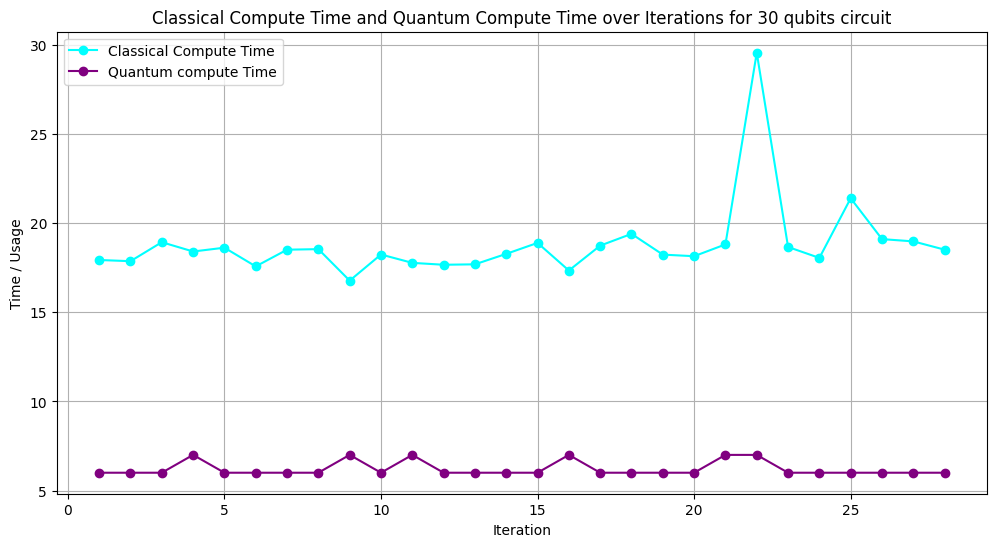

In [12]:
# Plot the data
plt.figure(figsize=(12, 6))

# Plot Classical Compute Time
plt.plot(q_4.index, q_4['classical_compute_time'], marker='o', linestyle='-', color='cyan', label='Classical Compute Time')

# Plot Usage (seconds)
plt.plot(q_4.index, q_4['Usage (seconds)'], marker='o', linestyle='-', color='purple', label='Quantum compute Time')

plt.xlabel('Iteration')
plt.ylabel('Time / Usage')
plt.title('Classical Compute Time and Quantum Compute Time over Iterations for 30 qubits circuit')
plt.legend()
plt.grid(True)
plt.show()